<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Lesson 11 - Clustering with Sklearn

---

In this notebook we'll practice clustering algorithms with Scikit-Learn.

## Data sets

We'll use the following datasets:
* Some sample data
* [Iris](http://archive.ics.uci.edu/ml/datasets/Iris)
* [Old Faithful eruption data](http://www.stat.cmu.edu/~larry/all-of-statistics/=data/faithful.dat): eruption times and wait times between eruptions of a geyser in the Yellowstone National Park

There are many [clustering data sets](https://archive.ics.uci.edu/ml/datasets.html?format=&task=clu&att=&area=&numAtt=&numIns=&type=&sort=nameUp&view=table) you can use for practice!


In [109]:
%matplotlib inline
from collections import Counter
import random

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
plt.style.use('ggplot')
# increase seaborn fonts
sns.set(font_scale=1.5)

from sklearn.cluster import KMeans, DBSCAN
from sklearn.manifold import TSNE

## Create some synthetic data

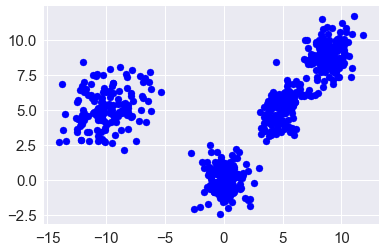

In [8]:
from scipy.stats import multivariate_normal

data = []

def create_data(data,num=150,mean=[0,0],cov=[[1,0],[0,1]]):
    dist = multivariate_normal(mean=mean, cov=cov)
    data.extend(dist.rvs(num).tolist())
    return data
        
data = []
data = create_data(data)
data = create_data(data,mean=[5,5], cov=[[1,0.5],[0.5,1]])
data = create_data(data,mean=[9,9], cov=[[1,0.2],[0.2,1]])
data = create_data(data,mean=[-10,5], cov=[[3,0.5],[0.5,2]])

df = pd.DataFrame(data, columns=["x", "y"])
df.head()
plt.scatter(df['x'], df['y'],c='b')
plt.show()

In [156]:
def annulus(inner_radius, outer_radius, n=30, color='b'):
    """Generate n points with class `colour` between the inner radius and the outer radius."""
    data = []
    diff = outer_radius - inner_radius
    for _ in range(n):
        # Pick an angle and radius
        angle = 2 * np.pi * random.random()
        r = inner_radius + diff * random.random()
        x = r * np.cos(angle)
        y = r * np.sin(angle)
        data.append((x, y))
    # Return a data frame for convenience
    xs, ys = zip(*data)
    df = pd.DataFrame()
    df["x"] = xs
    df["y"] = ys
    df["color"] = color
    return df

df1 = annulus(2, 6, 200, color='r')
df2 = annulus(8, 10, 300, color='b')
df_circ = pd.concat([df1, df2])

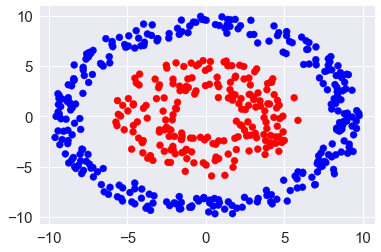

In [157]:
plt.scatter(df_circ['x'], df_circ['y'], c=df_circ['color'])
plt.show()

## K-Means with sklearn

In [11]:
# Fit a k-means estimator
estimator = KMeans(n_clusters=2)
X = df[["x", "y"]]
estimator.fit(X)
# Clusters are given in the labels_ attribute
labels = estimator.labels_
print(labels)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 

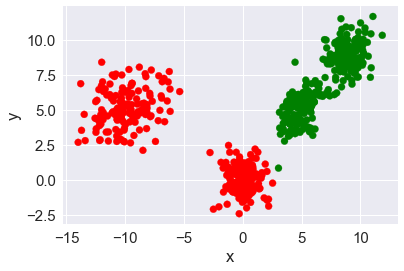

In [12]:
# Plot the data

def set_colors(labels, colors='rgbykcm'*10):
    colored_labels = []
    for label in labels:
        colored_labels.append(colors[label])
    return colored_labels

colors = set_colors(labels)
plt.scatter(df['x'], df['y'], c=colors)
plt.xlabel("x")
plt.ylabel("y")
plt.show()

Let's try it with `k=4` this time.

Counter({0: 150, 3: 150, 1: 150, 2: 150})


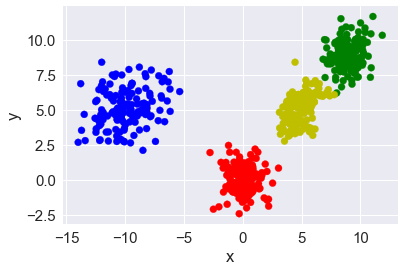

In [13]:
estimator = KMeans(n_clusters=4)
X = df[["x", "y"]]
estimator.fit(X)
# Clusters are given in the labels_ attribute
labels = estimator.labels_
print(Counter(labels))

colors = set_colors(labels)
plt.scatter(df['x'], df['y'], c=colors)
plt.xlabel("x")
plt.ylabel("y")
plt.show()

Let's try the circular data.

Counter({0: 188, 1: 161, 2: 151})


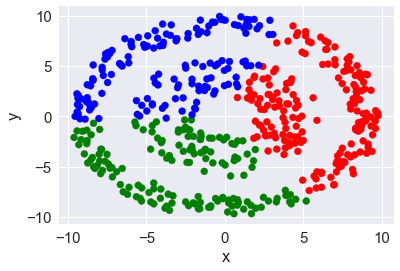

In [158]:
estimator = KMeans(n_clusters=3)
X = df_circ[["x", "y"]]
estimator.fit(X)
# Clusters are given in the labels_ attribute
labels = estimator.labels_
print(Counter(labels))

colors = set_colors(labels)
plt.scatter(df_circ['x'], df_circ['y'], c=colors)
plt.xlabel("x")
plt.ylabel("y")
plt.show()

Not so great on this dataset. Now let's try some real data.

In [15]:
of_df = pd.read_csv("../../assets/dataset/old-faithful.csv")
of_df.head()

,eruption_time,wait_time
0,3.600,79
1,1.800,54
2,3.333,74
3,2.283,62
4,4.533,85


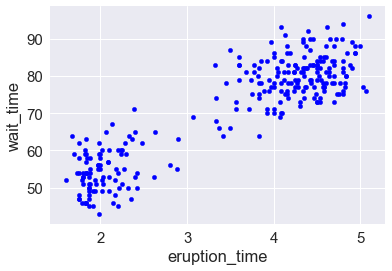

In [16]:
of_df.plot.scatter(x="eruption_time", y="wait_time",c='b')
plt.show()

Counter({1: 172, 0: 100})


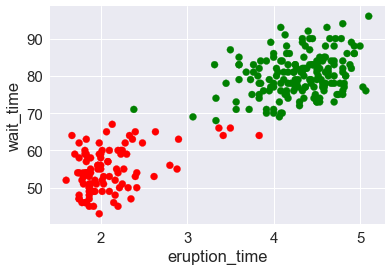

In [160]:
# Fit a k-means estimator
estimator = KMeans(n_clusters=2)
X = of_df[["eruption_time", "wait_time"]]
estimator.fit(X)
# Clusters are given in the labels_ attribute
labels = estimator.labels_
print(Counter(labels))

# Plot the data

colors = set_colors(labels)
plt.scatter(of_df["eruption_time"], of_df["wait_time"], c=colors)
plt.xlabel("eruption_time")
plt.ylabel("wait_time")
plt.show()

## Exercise: k-means

For the Iris dataset, fit and plot k-means models to:
* sepal_length and petal_length, for k=2 and k=3
* sepal_width and petal_width, for k=2 and k=3

Bonus: [Compare](http://scikit-learn.org/stable/modules/clustering.html#adjusted-rand-index) your classifications to the known species. How well do the labels match up?

After: Check out the 3D-example [here](http://scikit-learn.org/stable/auto_examples/cluster/plot_cluster_iris.html)

In [161]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


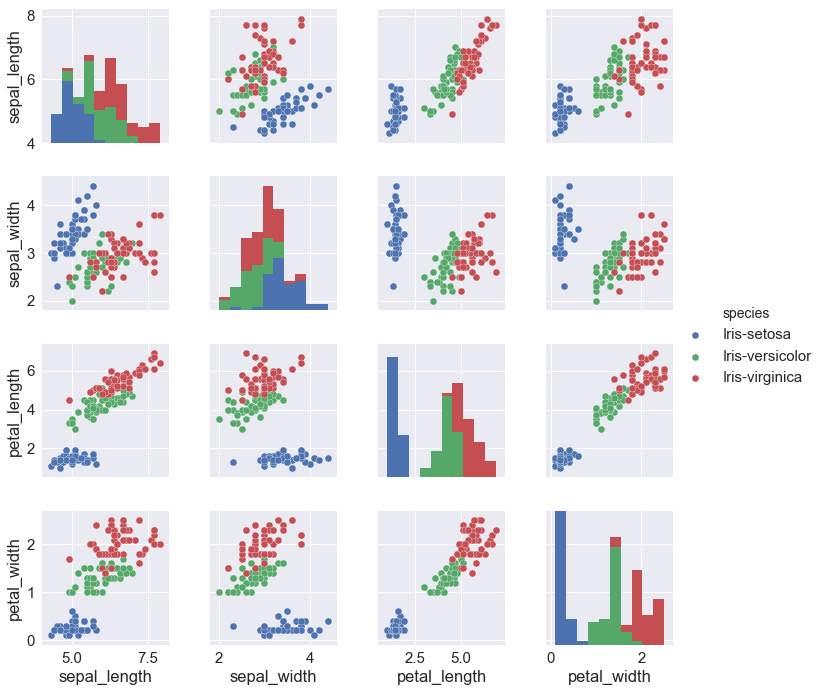

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [167]:
iris = pd.read_csv("../../assets/dataset/iris.data")

sns.pairplot(iris, hue="species")
plt.show()

iris.tail()

Counter({2: 58, 0: 51, 1: 41})


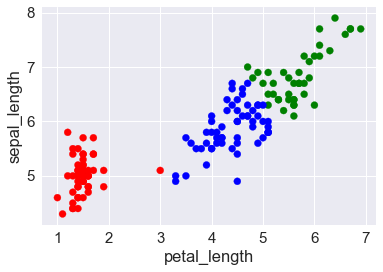

In [166]:
## Exercise Answers here
# Fit a k-means estimator

estimator = KMeans(n_clusters=3)
X = iris[["sepal_length", "petal_length"]]
estimator.fit(X)
# Clusters are given in the labels_ attribute
labels = estimator.labels_
X['label'] = labels
print(Counter(labels))

colors = set_colors(labels)
plt.scatter(iris["petal_length"], iris["sepal_length"], c=colors)
plt.xlabel("petal_length")
plt.ylabel("sepal_length")
plt.show()

In [20]:
print(labels)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 1 2 1 1 1 1 2 1 1 1 1
 1 1 2 2 1 1 1 1 2 1 2 1 2 1 1 2 2 1 1 1 1 1 1 1 1 1 1 2 1 1 1 2 1 1 1 2 1
 1 2]


In [23]:
label_map = {"Iris-setosa": 0, "Iris-versicolor": 2, "Iris-virginica": 1}

true_labels = []
for row in iris.itertuples():
    true_labels.append(label_map[row.species])

number_correct = 0
for t, l in zip(true_labels, labels):
    if t == l:
        number_correct += 1
print(number_correct / float(len(iris)))

0.88


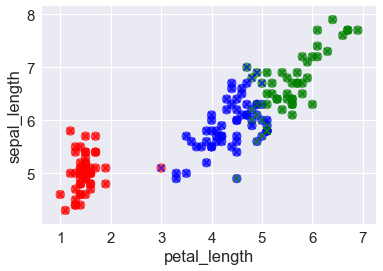

In [26]:
colors = set_colors(labels)
colors_true = set_colors(true_labels)
plt.scatter(iris["petal_length"], iris["sepal_length"], c=colors, s=80, alpha=0.7)
plt.scatter(iris["petal_length"], iris["sepal_length"], c=colors_true, marker='x',alpha=0.7)
plt.xlabel("petal_length")
plt.ylabel("sepal_length")
plt.show()

## DBSCAN

Counter({1: 151, 2: 143, 0: 139, 3: 114, -1: 53})


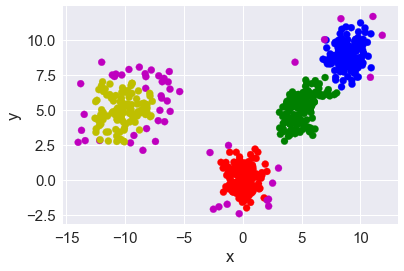

In [75]:
# Fit a DBSCAN estimator
estimator = DBSCAN(eps=0.85, min_samples=10)
X = df[["x", "y"]]
estimator.fit(X)
# Clusters are given in the labels_ attribute
labels = estimator.labels_
print(Counter(labels))

colors = set_colors(labels)
plt.scatter(df['x'], df['y'], c=colors)
plt.xlabel("x")
plt.ylabel("y")
plt.show()

Counter({1: 298, 0: 148, 2: 143, -1: 8, 3: 3})


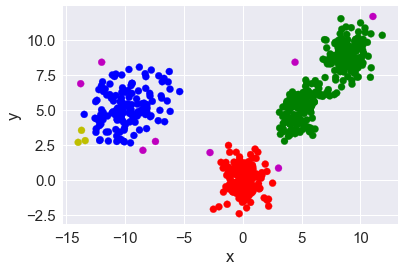

In [170]:
# Fit a DBSCAN estimator
estimator = DBSCAN(eps=1, min_samples=3)
X = df[["x", "y"]]
estimator.fit(X)
# Clusters are given in the labels_ attribute
labels = estimator.labels_
print(Counter(labels))

colors = set_colors(labels)

plt.scatter(df['x'], df['y'], c=colors)
plt.xlabel("x")
plt.ylabel("y")
plt.show()

Counter({1: 300, 0: 200})


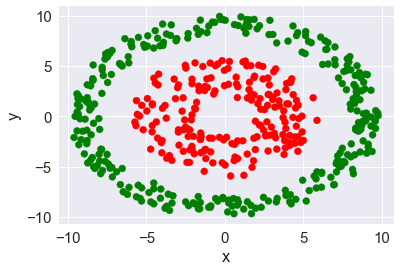

In [175]:
# Fit a DBSCAN estimator
estimator = DBSCAN(eps=2, min_samples=10)
X = df_circ[["x", "y"]]
estimator.fit(X)
# Clusters are given in the labels_ attribute
labels = estimator.labels_
print(Counter(labels))

colors = set_colors(labels)
plt.scatter(df_circ['x'], df_circ['y'], c=colors)
plt.xlabel("x")
plt.ylabel("y")
plt.show()

Much better than k-means on this dataset! Let's try to cook up something that DBSCAN doesn't work as well on.

### Create some synthetic data

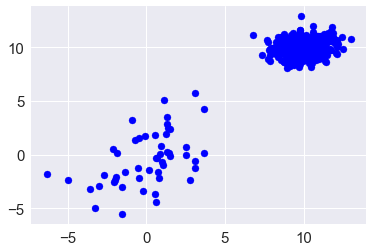

In [56]:
data = []
dist = multivariate_normal(mean=[0,0], cov=[[6,2],[2,6]])

data.extend(dist.rvs(50).tolist())
dist = multivariate_normal(mean=[10,10], cov=[[1,0.1],[0.1,0.6]])

data.extend(dist.rvs(400).tolist())
    
df2 = pd.DataFrame(data, columns=["x", "y"])
df2.head()
plt.scatter(df2['x'], df2['y'],c='b')
plt.show()

Counter({1: 400, 0: 41, -1: 9})


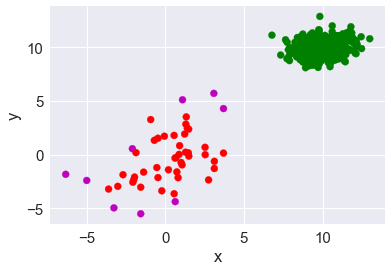

In [57]:
# Fit a DBSCAN estimator
estimator = DBSCAN(eps=2, min_samples=10)
X = df2[["x", "y"]]
estimator.fit(X)
# Clusters are given in the labels_ attribute
labels = estimator.labels_
print(Counter(labels))

colors = set_colors(labels)
plt.scatter(df2['x'], df2['y'], c=colors)
plt.xlabel("x")
plt.ylabel("y")
plt.show()

Counter({1: 400, 0: 50})


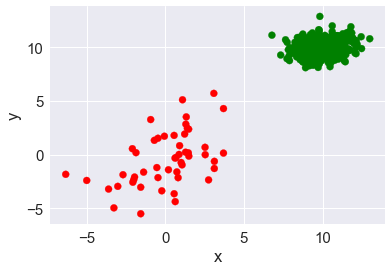

In [58]:
# Fit a DBSCAN estimator
estimator = DBSCAN(eps=4, min_samples=10)
X = df2[["x", "y"]]
estimator.fit(X)
# Clusters are given in the labels_ attribute
labels = estimator.labels_
print(Counter(labels))

colors = set_colors(labels)
plt.scatter(df2['x'], df2['y'], c=colors)
plt.xlabel("x")
plt.ylabel("y")
plt.show()

## Exercise: DBSCAN

For the Iris dataset, fit and plot DBSCAN models to:
* sepal_length and petal_length
* sepal_width and petal_width

Bonus: [Compare](http://scikit-learn.org/stable/modules/clustering.html#adjusted-rand-index) your classifications to the known species. How well do the labels match up?

Counter({1: 59, 0: 46, 2: 21, -1: 18, 3: 6})


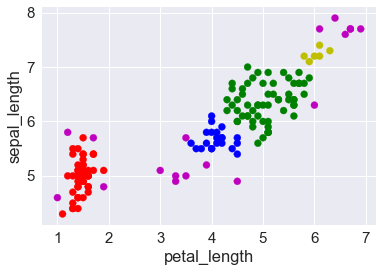

In [59]:
## Exercise Answers here

# Fit a DBSCAN
np.random.seed(10)
estimator = DBSCAN(eps=0.25, min_samples=5)
X = iris[["sepal_length", "petal_length"]]
estimator.fit(X)
# Clusters are given in the labels_ attribute
labels = estimator.labels_
print(Counter(labels))

colors = set_colors(labels)
plt.scatter(iris["petal_length"], iris["sepal_length"], c=colors)
plt.xlabel("petal_length")
plt.ylabel("sepal_length")
plt.show()

Counter({1: 98, 0: 48, -1: 4})


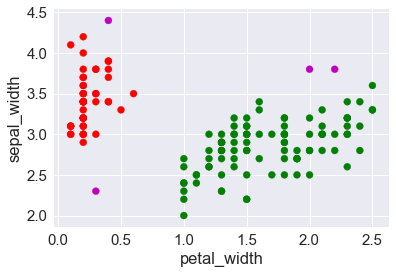

In [60]:
## Exercise Answers here

# Fit a DBSCAN
estimator = DBSCAN(eps=0.35, min_samples=10)
X = iris[["sepal_width", "petal_width"]]
estimator.fit(X)
# Clusters are given in the labels_ attribute
labels = estimator.labels_
print(Counter(labels))

colors = set_colors(labels)
plt.scatter(iris["petal_width"], iris["sepal_width"], c=colors)
plt.xlabel("petal_width")
plt.ylabel("sepal_width")
plt.show()

In [61]:
label_map = {"Iris-setosa": 0, "Iris-versicolor": 1, "Iris-virginica": 2}

true_labels = []
for row in iris.itertuples():
    true_labels.append(label_map[row.species])

number_correct = 0
for t, l in zip(true_labels, labels):
    if t == l:
        number_correct += 1
print(number_correct / float(len(iris)))

0.6533333333333333


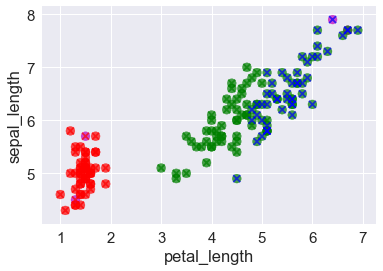

In [62]:
colors = set_colors(labels)
colors_true = set_colors(true_labels)
plt.scatter(iris["petal_length"], iris["sepal_length"], c=colors, s=80, alpha=0.7)
plt.scatter(iris["petal_length"], iris["sepal_length"], c=colors_true, marker='x',alpha=0.7)
plt.xlabel("petal_length")
plt.ylabel("sepal_length")
plt.show()

## Hierarchical Clustering

Counter({1: 157, 2: 150, 0: 150, 3: 143})


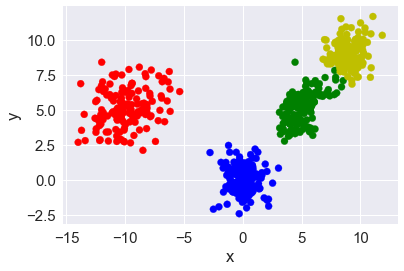

In [30]:
# Hierarchical: Agglomerative Clustering
from sklearn.cluster import AgglomerativeClustering

# Fit an estimator
estimator = AgglomerativeClustering(n_clusters=4)
X = df[["x", "y"]]
estimator.fit(X)
# Clusters are given in the labels_ attribute
labels = estimator.labels_
print(Counter(labels))

colors = set_colors(labels)
plt.scatter(df['x'], df['y'], c=colors)
plt.xlabel("x")
plt.ylabel("y")
plt.show()

Counter({0: 308, 1: 192})


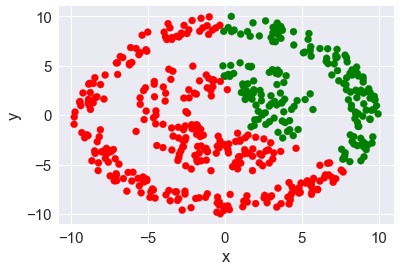

In [39]:
# Fit an estimator
estimator = AgglomerativeClustering(n_clusters=2)
X = df_circ[["x", "y"]]
estimator.fit(X)
# Clusters are given in the labels_ attribute
labels = estimator.labels_
print(Counter(labels))

colors = set_colors(labels)
plt.scatter(df_circ['x'], df_circ['y'], c=colors)
plt.xlabel("x")
plt.ylabel("y")
plt.show()

## Exercise: Hierarchical Clustering

For the Iris dataset, fit and plot hierarachical clustering models to:
* sepal_length and petal_length
* sepal_width and petal_width

Bonus: [Compare](http://scikit-learn.org/stable/modules/clustering.html#adjusted-rand-index) your classifications to the known species. How well do the labels match up?

Counter({0: 72, 1: 50, 2: 28})


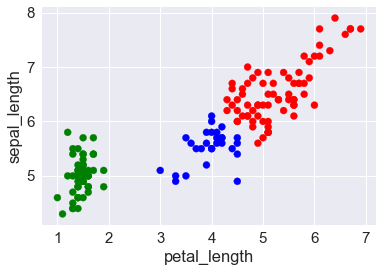

In [49]:
## Your answer here
# Fit hierarchical clustering
estimator = AgglomerativeClustering(n_clusters=3)
X = iris[["sepal_length", "petal_length"]]
estimator.fit(X)
# Clusters are given in the labels_ attribute
labels = estimator.labels_
print(Counter(labels))

colors = set_colors(labels)
plt.scatter(iris["petal_length"], iris["sepal_length"], c=colors)
plt.xlabel("petal_length")
plt.ylabel("sepal_length")
plt.show()

Counter({0: 74, 1: 50, 2: 26})


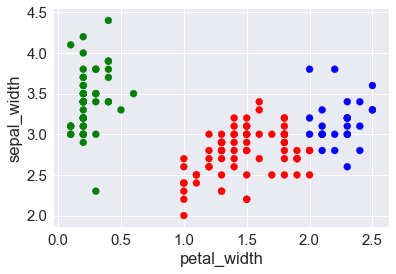

In [51]:
## Your answer here
# Fit hierarchical clustering
estimator = AgglomerativeClustering(n_clusters=3)
X = iris[["sepal_width", "petal_width"]]
estimator.fit(X)
# Clusters are given in the labels_ attribute
labels = estimator.labels_
print(Counter(labels))

colors = set_colors(labels)
plt.scatter(iris["petal_width"], iris["sepal_width"], c=colors)
plt.xlabel("petal_width")
plt.ylabel("sepal_width")
plt.show()

In [47]:
label_map = {"Iris-setosa": 1, "Iris-versicolor": 0, "Iris-virginica": 2}

true_labels = []
for row in iris.itertuples():
    true_labels.append(label_map[row.species])

number_correct = 0
for t, l in zip(true_labels, labels):
    if t == l:
        number_correct += 1
print(number_correct / float(len(iris)))

0.84


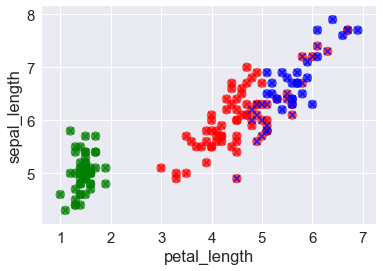

In [52]:
colors = set_colors(labels)
colors_true = set_colors(true_labels)
plt.scatter(iris["petal_length"], iris["sepal_length"], c=colors, s=80, alpha=0.7)
plt.scatter(iris["petal_length"], iris["sepal_length"], c=colors_true, marker='x',alpha=0.7)
plt.xlabel("petal_length")
plt.ylabel("sepal_length")
plt.show()

## Elbow Method

In [178]:
estimator.cluster_centers_

array([[  4.38865590e+00,   4.22079129e+00],
       [ -1.00003433e+01,   4.34613741e+00],
       [  8.53897474e+00,   8.40689702e+00],
       [ -6.74703946e-01,   1.18935417e-02],
       [  5.51652568e+00,   5.91956215e+00],
       [ -7.59128580e+00,   5.75234010e+00],
       [  9.55653292e+00,   9.72296513e+00],
       [ -1.23446679e+01,   3.98587915e+00],
       [  8.15134895e-01,   9.69682461e-02],
       [ -1.07645865e+01,   6.66150642e+00]])

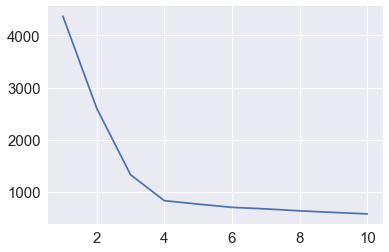

In [177]:
X = df[["x", "y"]]
wk_coeff = []
k_values = range(1, 11)


for n_cluster in k_values:
    estimator = KMeans(n_clusters=n_cluster)
    estimator.fit(X)
    # Clusters are given in the labels_ attribute
    labels = estimator.labels_
    val = 0
    for e, c in enumerate(estimator.cluster_centers_):
        val += ((df[labels == e][df.columns[0]] - c[0])**2 + 
        (df[labels == e][df.columns[1]] - c[1])**2).apply(np.sqrt).sum()
    wk_coeff.append(val)

plt.plot(k_values,wk_coeff)

## Silhouette Coefficient

In [77]:
from sklearn import metrics

estimator = KMeans(n_clusters=4)
X = df[["x", "y"]]
estimator.fit(X)
# Clusters are given in the labels_ attribute
labels = estimator.labels_
print(Counter(labels))

print(metrics.silhouette_score(X, labels, metric='euclidean'))

Counter({3: 150, 0: 150, 2: 150, 1: 150})
0.710860702522


In [78]:
estimator = DBSCAN(eps=1.2, min_samples=10)
X = df[["x", "y"]]
estimator.fit(X)
# Clusters are given in the labels_ attribute
labels = estimator.labels_
print(Counter(labels))
print(metrics.silhouette_score(X, labels, metric='euclidean'))

Counter({1: 299, 0: 149, 2: 139, -1: 13})
0.611804086888


In [79]:
estimator = AgglomerativeClustering(n_clusters=4)
X = df[["x", "y"]]
estimator.fit(X)
# Clusters are given in the labels_ attribute
labels = estimator.labels_
print(Counter(labels))

print(metrics.silhouette_score(X, labels, metric='euclidean'))

Counter({1: 157, 2: 150, 0: 150, 3: 143})
0.70208731891


For the silhouette coefficient, larger is better, so k-means was a better clustering algorithm on this data set with the given parameter choice.

## Exercise: Silhouette coefficients

Test k-means, DBSCAN and hierarchical clustering varying the model parameters on the iris dataset. Judge the quality of the models by their Silhouette coefficients. 

**Bonus:** Repeat the same on the remaining datasets used in this lab.

In [98]:
X = iris[["sepal_width", "petal_width"]]

In [99]:
dict_Kmeans = {}
for i in range(2,20):
    model = KMeans(n_clusters=i)
    model.fit(X)
    labels = model.labels_
    dict_Kmeans[i] = metrics.silhouette_score(X, labels, metric='euclidean')

In [100]:
pd.Series(dict_Kmeans).max()

0.6265665447235983

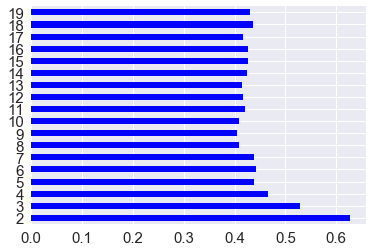

In [101]:
pd.Series(dict_Kmeans).plot(kind='barh',color='b')
plt.show()

In [102]:
dict_Hierarchical = {}
for i in range(2,20):
    model = AgglomerativeClustering(n_clusters=i)
    model.fit(X)
    labels = model.labels_
    dict_Hierarchical[i] = metrics.silhouette_score(X, labels, metric='euclidean')

In [103]:
pd.Series(dict_Hierarchical).max()

0.6265665447235983

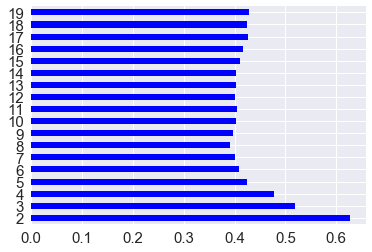

In [104]:
pd.Series(dict_Hierarchical).plot(kind='barh',color='b')
plt.show()

In [143]:
dict_DBSCAN = {}
for i in np.linspace(0.01,0.5,10):
    dict_j = {}
    for j in range(2,10):
        try:
            model = DBSCAN(eps=i,min_samples=j)
            model.fit(X)
            labels = model.labels_
            silhouette = metrics.silhouette_score(X, labels, metric='euclidean')
            dict_j[j] = silhouette
        except:
            pass
        
    dict_DBSCAN[i] = dict_j

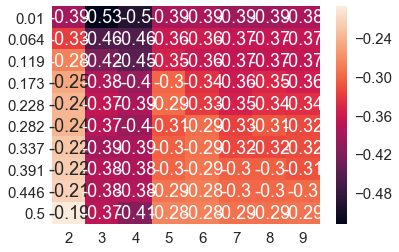

In [144]:
DB_results = pd.DataFrame(dict_DBSCAN).T
DB_results.index = np.round(DB_results.index,3)
sns.heatmap(DB_results,annot=True)
#.plot(kind='barh',color='b')
plt.show()

In [145]:
(DB_results).stack().max()

-0.19084066523659124

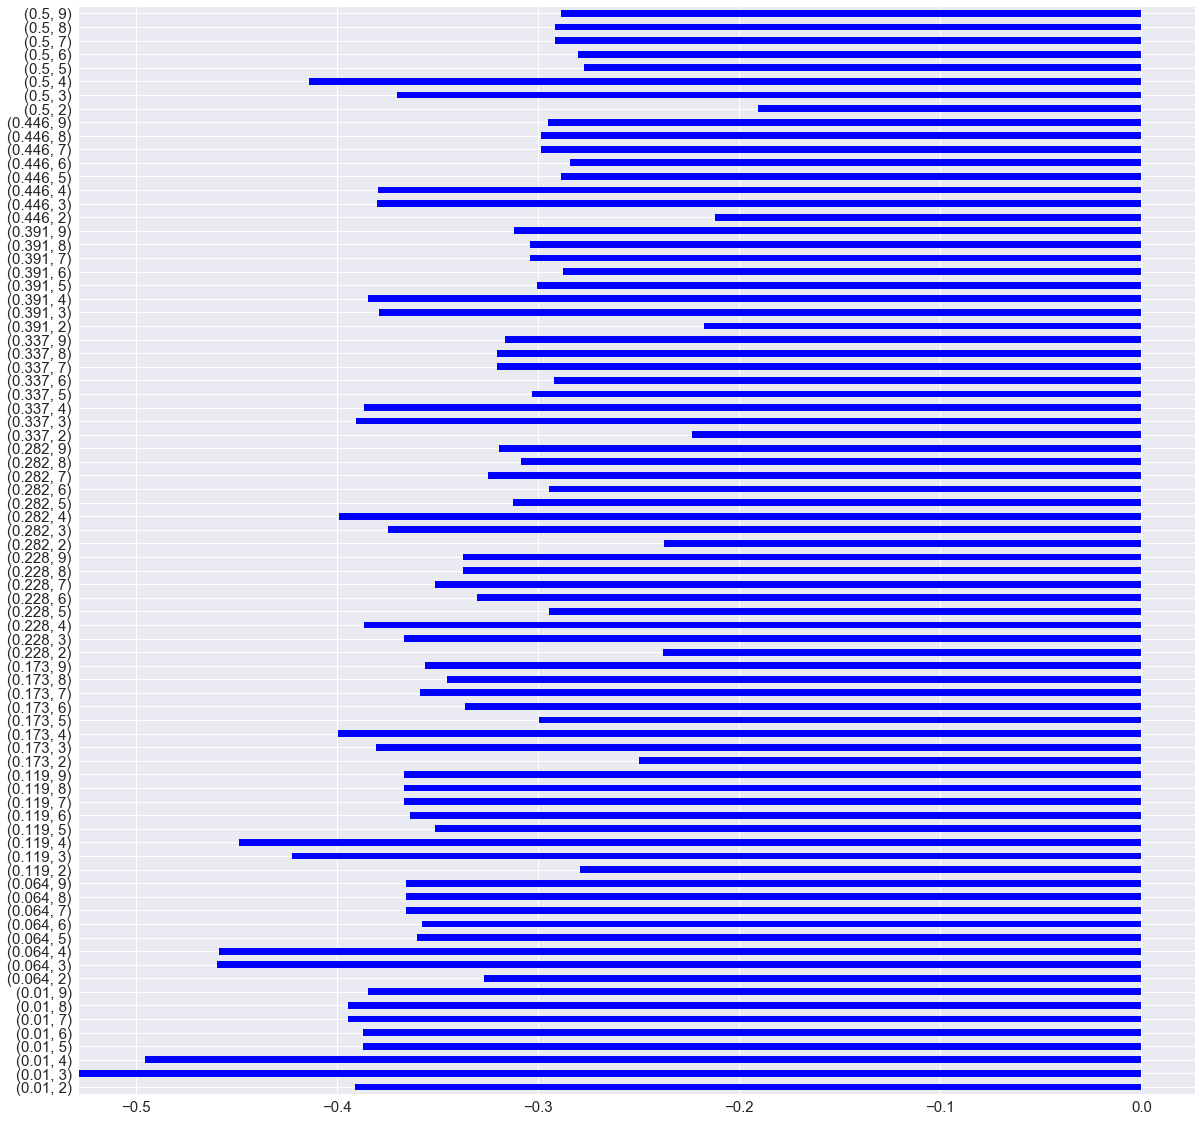

In [146]:
plt.figure(figsize=(20,20))
(DB_results).stack().plot(kind='barh',color='b')
plt.show()

## Clustering for more than 2 variables

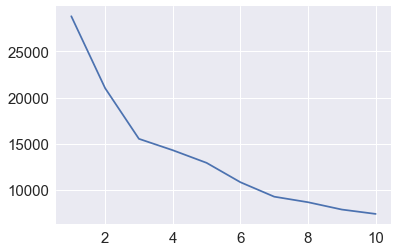

In [133]:
#X = df[["x", "y"]]
X = feature_set
wk_coeff = []
k_values = range(1, 11)


for n_cluster in k_values:
    estimator = KMeans(n_clusters=n_cluster)
    estimator.fit(X)
    # Clusters are given in the labels_ attribute
    labels = estimator.labels_
    val = 0
    for e, c in enumerate(estimator.cluster_centers_):
        val += ((titanic[labels == e]['is_male'] - c[0])**2 + 
        (titanic[labels == e][1] - c[1])**2+
               (titanic[labels == e][2] - c[2])**2 + 
               (titanic[labels == e]['Fare'] - c[3])**2 + 
               (titanic[labels == e]['Age'] - c[4])**2 + 
               (titanic[labels == e]['had_parents'] - c[5])**2 + 
               (titanic[labels == e]['had_siblings'] - c[6])**2).apply(np.sqrt).sum()
    wk_coeff.append(val)

plt.plot(k_values,wk_coeff)

In [149]:
titanic = pd.read_csv('../../assets/dataset/titanic.csv')
titanic.set_index('PassengerId', inplace=True)
titanic = titanic.join(pd.get_dummies(titanic.Pclass))
titanic['is_male'] = titanic.Sex.apply(lambda x: True if x == 'male' else False)


titanic['Age'] = titanic.groupby(["Sex", 'Pclass']).Age.transform(lambda x: x.fillna(x.mean()))
titanic['had_parents'] = titanic.Parch.apply(lambda x: 1 if x > 0 else 0)
titanic['had_siblings'] = titanic.SibSp.apply(lambda x: 1 if x > 0 else 0)
feature_set = titanic[['is_male', 1, 2, 'Fare', 'Age', 'had_parents', 'had_siblings']]
kmeans = KMeans(n_clusters=8).fit(feature_set)
#feature_set
labels = kmeans.labels_

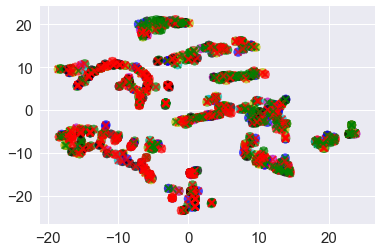

In [179]:
feature_set_embedded = TSNE(n_components=2).fit_transform(feature_set)
x_embedded,y_embedded = zip(*feature_set_embedded)

true_labels = []
for row in titanic.itertuples():
    true_labels.append(row.Survived)



colors = set_colors(labels)
colors_true = set_colors(true_labels)
plt.scatter(x_embedded, y_embedded, c=colors, s=80, alpha=0.7)
plt.scatter(x_embedded, y_embedded, c=colors_true, marker='x',alpha=0.7)
#plt.xlabel("petal_length")
#plt.ylabel("sepal_length")
plt.show()